In [1]:
import os
# Set the working directory to your desired path
os.chdir(r'C:\Work\DS Study\G1\Data')

# Verify the change
print(os.getcwd())

C:\Work\DS Study\G1\Data


In [2]:
import pandas as pd
df = pd.read_csv("daily-minimum-temperatures-in-me.csv", header=0, index_col=0, parse_dates=True)

In [3]:
print(df)

           Daily minimum temperatures
Date                                 
1981-01-01                       20.7
1981-01-02                       17.9
1981-01-03                       18.8
1981-01-04                       14.6
1981-01-05                       15.8
...                               ...
1990-12-27                         14
1990-12-28                       13.6
1990-12-29                       13.5
1990-12-30                       15.7
1990-12-31                         13

[3650 rows x 1 columns]


In [4]:
df.rename(columns={'Daily minimum temperatures':'min_temp'},inplace=True)
df


,min_temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


In [5]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [6]:
df

,min_temp,year,month,day
Date,,,,
1981-01-01,20.7,1981,1,1
1981-01-02,17.9,1981,1,2
1981-01-03,18.8,1981,1,3
1981-01-04,14.6,1981,1,4
1981-01-05,15.8,1981,1,5
...,...,...,...,...
1990-12-27,14,1990,12,27
1990-12-28,13.6,1990,12,28
1990-12-29,13.5,1990,12,29


In [7]:
df['t-1'] = df['min_temp'].shift(1)

In [8]:
df

,min_temp,year,month,day,t-1
Date,,,,,
1981-01-01,20.7,1981,1,1,None
1981-01-02,17.9,1981,1,2,20.7
1981-01-03,18.8,1981,1,3,17.9
1981-01-04,14.6,1981,1,4,18.8
1981-01-05,15.8,1981,1,5,14.6
...,...,...,...,...,...
1990-12-27,14,1990,12,27,14.6
1990-12-28,13.6,1990,12,28,14
1990-12-29,13.5,1990,12,29,13.6


In [9]:
df['t-2'] = df['min_temp'].shift(2)
df['t-3'] = df['min_temp'].shift(3)

In [10]:
df

,min_temp,year,month,day,t-1,t-2,t-3
Date,,,,,,,
1981-01-01,20.7,1981,1,1,None,None,None
1981-01-02,17.9,1981,1,2,20.7,None,None
1981-01-03,18.8,1981,1,3,17.9,20.7,None
1981-01-04,14.6,1981,1,4,18.8,17.9,20.7
1981-01-05,15.8,1981,1,5,14.6,18.8,17.9
...,...,...,...,...,...,...,...
1990-12-27,14,1990,12,27,14.6,12.9,10
1990-12-28,13.6,1990,12,28,14,14.6,12.9
1990-12-29,13.5,1990,12,29,13.6,14,14.6


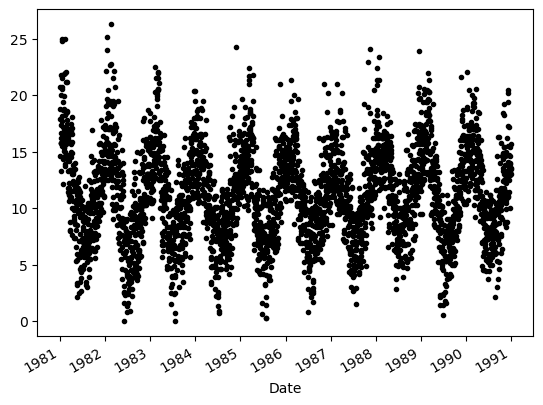

In [11]:
from matplotlib import pyplot
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['min_temp'].plot(style='k.')
pyplot.show()

In [12]:
groups = df['min_temp'].groupby(pd.Grouper(freq='YE'))

In [13]:
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
print(years)

     1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
0    20.7  17.0  18.4  19.5  13.3  12.9  12.3  15.3  14.3  14.8
1    17.9  15.0  15.0  17.1  15.2  13.8  13.8  14.3  17.4  13.3
2    18.8  13.5  10.9  17.1  13.1  10.6  15.3  13.5  18.5  15.6
3    14.6  15.2  11.4  12.0  12.7  12.6  15.6  15.0  16.8  14.5
4    15.8  13.0  14.8  11.0  14.6  13.7  16.2  13.6  11.5  14.3
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
360  15.5  15.3  13.9  12.2  11.5  14.6  16.2   9.5  13.3  14.0
361  13.3  16.3  11.1  12.0  10.8  14.2  14.2  12.9  11.7  13.6
362  15.6  15.8  16.1  12.6  12.0  13.2  14.3  12.9  10.4  13.5
363  15.2  17.7  20.4  16.0  16.3  11.7  13.3  14.8  14.4  15.7
364  17.4  16.3  18.0  16.4  14.4  17.2  16.7  14.1  12.7  13.0

[365 rows x 10 columns]


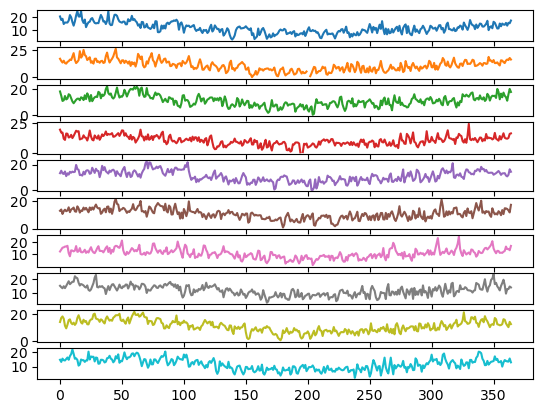

In [14]:
years.plot(subplots=True, legend=False)
pyplot.show()